## Lab 02: Project Gutenberg Books (1/2)

In this lab we will process books from the [Project Gutenberg](https://www.gutenberg.org/) site which is a public respository of large numbers of books that are in the public domain. We will first go over the two books used in the demo code for YData, and then you will have a chance to process books of your own choosing.





In [21]:
from datascience import *
import numpy as np

# direct plots to appear within the cell, and set their style
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# turn off some pesky warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)


In [22]:
from urllib.request import urlopen 
import re
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

The online book for "Adventures of Huckleberry Finn," by Mark Twain, is [here](https://www.gutenberg.org/ebooks/76).
From this web site you can see various metadata for the book as well as the [link the text itself](https://www.gutenberg.org/files/76/76-0.txt), which is [https://www.gutenberg.org/files/76/76-0.txt](https://www.gutenberg.org/files/76/76-0.txt)


In [23]:
huck_finn_url = 'https://www.gutenberg.org/files/76/76-0.txt'
huck_finn_text = read_url(huck_finn_url)
huck_finn_chapters = huck_finn_text.split('CHAPTER ')[44:]


The online book for "Little Women," by Louisa May Alcott, is [here](https://www.gutenberg.org/ebooks/514).
From this web site you can see various metadata for the book as well as the [link the text itself](http://www.gutenberg.org/cache/epub/514/pg514.txt), which is [http://www.gutenberg.org/cache/epub/514/pg514.txt](http://www.gutenberg.org/cache/epub/514/pg514.txt)


In [24]:
little_women_url = 'http://www.gutenberg.org/cache/epub/514/pg514.txt'
little_women_text = read_url(little_women_url)
little_women_chapters = little_women_text.split('CHAPTER ')[1:]

In [25]:
# Display the chapters of Huckleberry Finn

Table().with_column('Chapters', huck_finn_chapters)

Chapters
I. YOU don't know about me without you have read a book ...
II. WE went tiptoeing along a path amongst the trees bac ...
"III. WELL, I got a good going-over in the morning from o ..."
"IV. WELL, three or four months run along, and it was wel ..."
V. I had shut the door to. Then I turned around and ther ...
"VI. WELL, pretty soon the old man was up and around agai ..."
VII. “GIT up! What you 'bout?” I opened my eyes and look ...
VIII. THE sun was up so high when I waked that I judged ...
IX. I wanted to go and look at a place right about the m ...
X. AFTER breakfast I wanted to talk about the dead man a ...


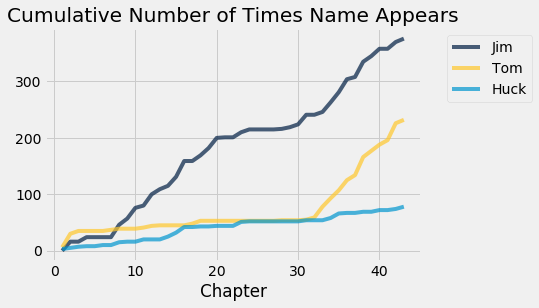

In [26]:
# Count how many times the names Jim, Tom, and Huck appear in each chapter

counts = Table().with_columns([
        'Jim', np.char.count(huck_finn_chapters, 'Jim'),
        'Tom', np.char.count(huck_finn_chapters, 'Tom'),
        'Huck', np.char.count(huck_finn_chapters, 'Huck')
    ])

# Plot the cumulative counts:
# how many times in Chapter 1, how many times in Chapters 1 and 2, and so on.

cum_counts = counts.cumsum().with_column('Chapter', np.arange(1, 44, 1))
cum_counts.plot(column_for_xticks=3)
plots.title('Cumulative Number of Times Name Appears');

In [27]:
# The chapters of Little Women

Table().with_column('Chapters', little_women_chapters)

Chapters
"ONE PLAYING PILGRIMS ""Christmas won't be Christmas witho ..."
TWO A MERRY CHRISTMAS Jo was the first to wake in the gr ...
"THREE THE LAURENCE BOY ""Jo! Jo! Where are you?"" cried Me ..."
"FOUR BURDENS ""Oh, dear, how hard it does seem to take up ..."
"FIVE BEING NEIGHBORLY ""What in the world are you going t ..."
SIX BETH FINDS THE PALACE BEAUTIFUL The big house did pr ...
"SEVEN AMY'S VALLEY OF HUMILIATION ""That boy is a perfect ..."
"EIGHT JO MEETS APOLLYON ""Girls, where are you going?"" as ..."
"NINE MEG GOES TO VANITY FAIR ""I do think it was the most ..."
"TEN THE P.C. AND P.O. As spring came on, a new set of am ..."


In [28]:
# Counts of names in the chapters of Little Women

# this is a dictionary based method to do what we did earlier for Huck:
people = ['Amy', 'Beth', 'Jo', 'Laurie', 'Meg']
people_counts = {pp: np.char.count(little_women_chapters, pp) for pp in people}

counts = Table().with_columns([
        'Amy', people_counts['Amy'],
        'Beth', people_counts['Beth'],
        'Jo', people_counts['Jo'],
        'Laurie', people_counts['Laurie'],
        'Meg', people_counts['Meg']
    ])

# this will be the same!
counts2 = Table().with_columns([
        'Amy', np.char.count(little_women_chapters, 'Amy'),
        'Beth', np.char.count(little_women_chapters, 'Beth'),
        'Jo', np.char.count(little_women_chapters, 'Jo'),
        'Laurie', np.char.count(little_women_chapters, 'Laurie'),
        'Meg', np.char.count(little_women_chapters, 'Meg'),
    ])


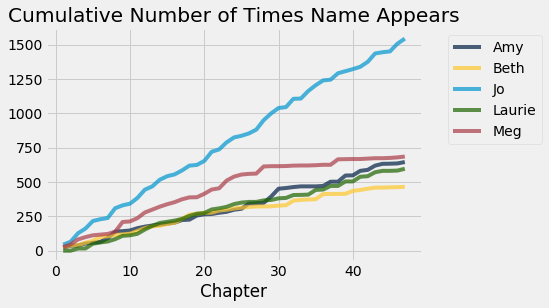

In [29]:
# Plot the cumulative counts

cum_counts = counts.cumsum().with_column('Chapter', np.arange(1, 48, 1))
cum_counts.plot(column_for_xticks=5)
plots.title('Cumulative Number of Times Name Appears');

In [30]:
# In each chapter, count the number of all characters;
# call this the "length" of the chapter.
# Also count the number of periods.

chars_periods_hf = Table().with_columns([
        'HF Chapter Length', [len(s) for s in huck_finn_chapters],
        'Number of Periods', np.char.count(huck_finn_chapters, '.')
    ])

chars_periods_lw = Table().with_columns([
        'LW Chapter Length', [len(s) for s in little_women_chapters],
        'Number of Periods', np.char.count(little_women_chapters, '.')
    ])

In [31]:
# The counts for Huckleberry Finn

chars_periods_hf

HF Chapter Length,Number of Periods
7026,66
11982,117
8529,72
6799,84
8166,91
14550,125
13218,127
22208,249
8081,71
7036,70


In [32]:
# The counts for Little Women

chars_periods_lw

LW Chapter Length,Number of Periods
21759,189
22148,188
20558,231
25526,195
23395,255
14622,140
14431,131
22476,214
33767,337
18507,185


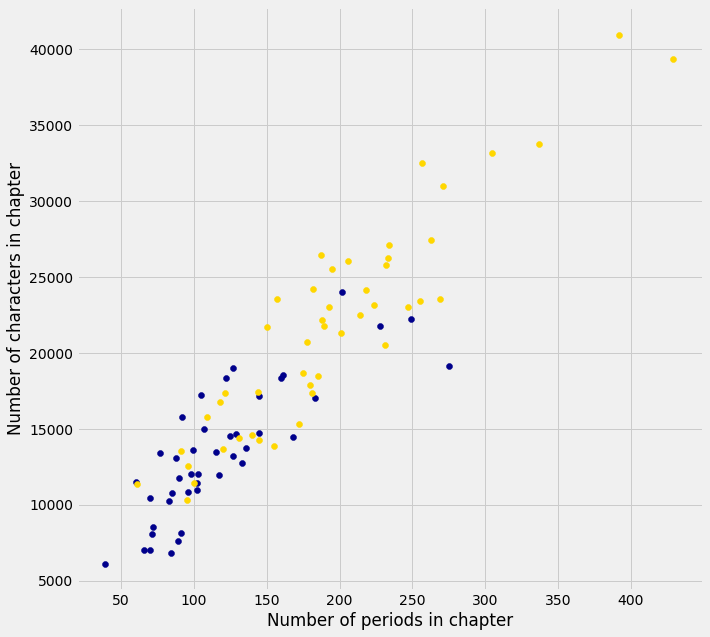

In [33]:
plots.figure(figsize=(10,10))
plots.scatter(chars_periods_hf[1], chars_periods_hf[0], color='darkblue')
plots.scatter(chars_periods_lw[1], chars_periods_lw[0], color='gold')
plots.xlabel('Number of periods in chapter')
plots.ylabel('Number of characters in chapter');

## Your turn!

Your task is to repeat the above analysis for two new Gutenberg books, of your own choosing.
If you need any suggestions, just check out [the most popular books](https://www.gutenberg.org/browse/scores/top). Or, just try [a random book](https://www.gutenberg.org/ebooks/search/?sort_order=random)! Remember, you can access the raw text by clicking on the 'Plain Text UTF-8' link.

Finish your notebook by describing a 'story' for why the number of occurrences of the characters by chapter have the shapes they do, as we did for Huckleberry Finn.
Specifically, you need to carry out the following steps:

* Choose a book from Gutenberg. You should be vaguely familiar with the plot, enough to do a quick refresher with some Googling. 
* Browse the book, and learn its structure in the raw text, and how chapters are delineated.
* Split the text into chapters, and figure out how many you might need to ignore with the table of contents, frontmatter, etc.
* Determine who the main characters are, and find how many times they are mentioned in each chapter.
* Do the same for the chapter lengths and number of periods.
* Give plots as above.
* Add a cell that gives a 'story' for how the plots reflect the actual plot of the book.

Then repeat this for a second book. You can copy-paste the above cells below, and then edit them with the modified code for your own books. You can either do the two books together, as above, or separate them and do one book at a time.

Your final notebook should include the code above for HF and LW, as well as your own analysis below for your two books of choice.

Have fun!






First book: *The Count of Monte Cristo*

In [34]:
monte_cristo_url = 'https://www.gutenberg.org/files/1184/1184-0.txt'
monte_cristo_text = read_url(monte_cristo_url)
monte_cristo_chapters = monte_cristo_text.split('Chapter')[118:]
# monte_cristo_chapters

In [35]:
# Display the chapters

Table().with_column('Chapters', monte_cristo_chapters)

Chapters
"1. Marseilles—The Arrival On the 24th of February, 1815 ..."
2. Father and Son We will leave Danglars struggling wit ...
"3. The Catalans Beyond a bare, weather-worn wall, about ..."
4. Conspiracy Danglars followed Edmond and Mercédès wit ...
5. The Marriage Feast The morning’s sun rose clear and ...
6. The Deputy Procureur du Roi In one of the aristocrat ...
7. The Examination No sooner had Villefort left the sal ...
"8. The Château d’If The commissary of police, as he tra ..."
"9. The Evening of the Betrothal Villefort had, as we ha ..."
10. The King’s Closet at the Tuileries We will leave Vi ...


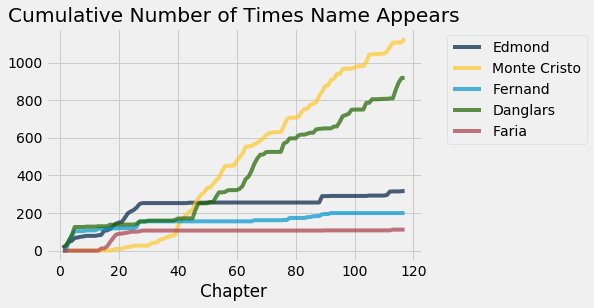

In [53]:
# Count how many times the names Edmond, Monte Cristo, Fernand, Danglars, Faria appear in each chapter

counts = Table().with_columns([
        'Edmond', np.char.count(monte_cristo_chapters, 'Edmond'),
        'Monte Cristo', np.char.count(monte_cristo_chapters, 'Monte Cristo'),
        'Fernand', np.char.count(monte_cristo_chapters, 'Fernand'),
        'Danglars', np.char.count(monte_cristo_chapters, 'Danglars'),
        'Faria', np.char.count(monte_cristo_chapters, 'Faria')
    ])
# print(counts)

cum_counts = counts.cumsum().with_column('Chapter', np.arange(1, 118, 1))
cum_counts.plot(column_for_xticks=5)
plots.title('Cumulative Number of Times Name Appears');


In [37]:
# In each chapter, count the number of all characters;
# call this the "length" of the chapter.
# Also count the number of periods.

chars_periods_mc = Table().with_columns([
        'MC Chapter Length', [len(s) for s in monte_cristo_chapters],
        'Number of Periods', np.char.count(monte_cristo_chapters, '.')
    ])
chars_periods_mc

MC Chapter Length,Number of Periods
17296,158
13531,133
21668,140
12465,99
31568,223
24362,155
19563,182
17620,173
10166,95
15919,150


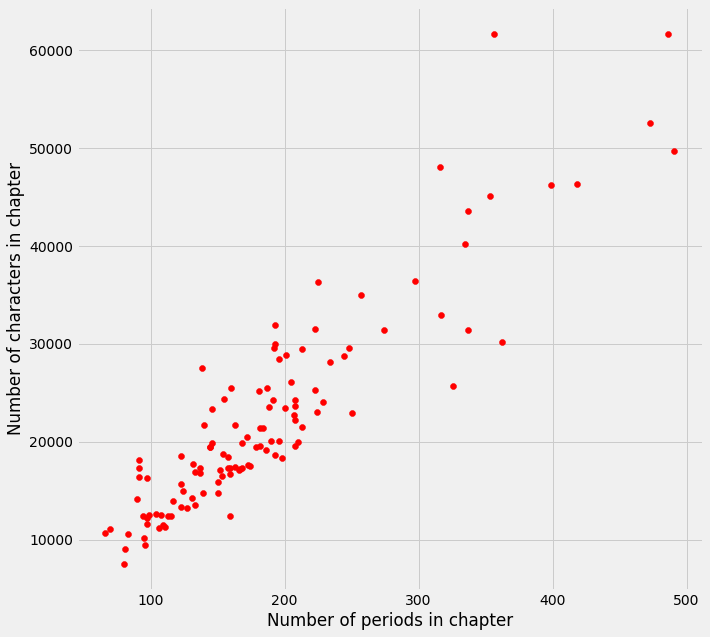

In [46]:
plots.figure(figsize=(10,10))
#plots.scatter(chars_periods_hf[1], chars_periods_hf[0], color='darkblue')
#plots.scatter(chars_periods_lw[1], chars_periods_lw[0], color='gold')
plots.scatter(chars_periods_mc[1], chars_periods_mc[0], color='red')
plots.xlabel('Number of periods in chapter')
plots.ylabel('Number of characters in chapter');

Add a cell that gives a 'story' for how the plots reflect the actual plot of the book.

*The actual plot of the book*:
    The story opens in 1815. The 19 year-old French sailor, **Edmond Dantes** and his two friends, **Danglars** and **Fernand** was on their way to Marseille. The dying old captain let Edmond be the captain and asked him to secretly deliver an “innocent” letter for Napoleon to someone in Paris.   
    However, Edmond’s two friends were jealous of his rapid rise to captain, so they betrayed Edmond by telling the town’s magistrate about Edmond’ letter from Napoleon. The magistrate had Edmond arrested and was sent to the prison on an island.   
    Edmond spent 14 years in the prison. One day, from the stones brick of his prison wall came an old man, **Faria**, a pastor who had been trying to dig his way to freedom for years. The two became friends. Faria began to educate Edmond in economics, history, mathematics, swordmanship...and he told Edmond a place where had a vast treasure, in case Edmond would escape.  
    One day, Faria passed away because of a disease. Edmond put the Faria’s body in the wall. He went to the bag which used to deliver Faria’s body. The prison guard didn’t notice that and throw the body bag into the sea. Edmond ripped the bag and swam to an island nearby. He escaped successfully and got freedom!  
    Then he found the treasure Faria told him and became a billionaire. What Edmond learned from Faria made him become a knowledgeable，rich gentleman. He purchased a fantastic mansion in Paris and announced himself as **“The Count of Monte Cristo”**. Then he revenged on all who betrayed him.  

*How the plots reflect it*:
From the Cumulative Number of Times Name Appears plot, we can see that the **Monte Cristo** significantly increases from chapter 20 to 120, while **Edmond** increases until chapter 20-ish and remain constant. This corresponds that Edmond escaped the prison and used the new name the count of Monte Cristo. Fernand, Danglars, Faria's names increases until chapter 20-ish and remain constant.

Second Book: A Christmas Carol

In [44]:
christmas_carol_url = 'https://www.gutenberg.org/files/46/46-0.txt'
christmas_carol_text = read_url(christmas_carol_url)
christmas_carol_chapters = christmas_carol_text.split('STAVE')[1:]
# christmas_carol_chapters

In [40]:
# Display the chapters of A Christmas Carol
Table().with_column('STAVE', christmas_carol_chapters)

STAVE
I: MARLEY'S GHOST MARLEY was dead: to begin with. There ...
"II: THE FIRST OF THE THREE SPIRITS WHEN Scrooge awoke, ..."
III: THE SECOND OF THE THREE SPIRITS AWAKING in the mid ...
"IV: THE LAST OF THE SPIRITS THE Phantom slowly, gravely ..."
V: THE END OF IT YES! and the bedpost was his own. The ...


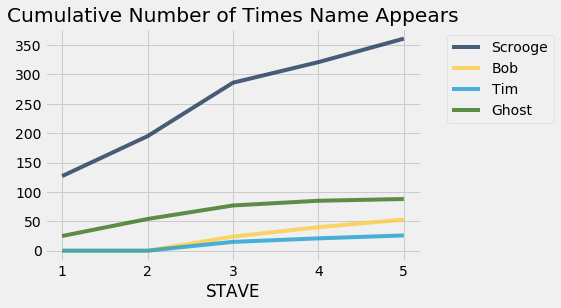

In [41]:
# Count how many times the names Scrooge, Bob, Tim, Ghost appear in each chapter

counts = Table().with_columns([
        'Scrooge', np.char.count(christmas_carol_chapters, 'Scrooge'),
        'Bob', np.char.count(christmas_carol_chapters, 'Bob'),
        'Tim', np.char.count(christmas_carol_chapters, 'Tim'),
        'Ghost', np.char.count(christmas_carol_chapters, 'Ghost')
    ])
# print(counts)

cum_counts = counts.cumsum().with_column('STAVE', np.arange(1,6,1))
cum_counts.plot(column_for_xticks=4)
plots.title('Cumulative Number of Times Name Appears');


In [42]:
# In each chapter, count the number of all characters;
# call this the "length" of the chapter.
# Also count the number of periods.

chars_periods_cc = Table().with_columns([
        'CC Chapter Length', [len(s) for s in christmas_carol_chapters],
        'Number of Periods', np.char.count(christmas_carol_chapters, '.')
    ])
chars_periods_cc

CC Chapter Length,Number of Periods
35952,331
33777,283
46023,323
28847,329
30912,366


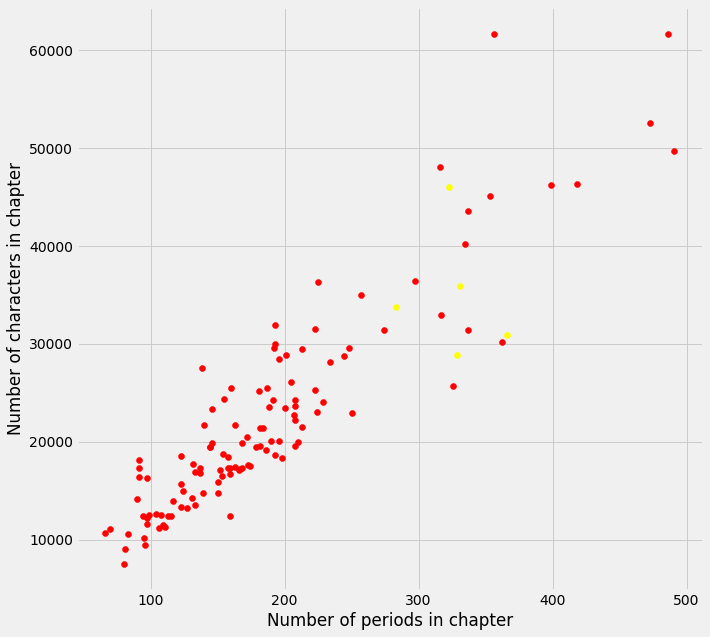

In [47]:
plots.figure(figsize=(10,10))
#plots.scatter(chars_periods_hf[1], chars_periods_hf[0], color='darkblue')
#plots.scatter(chars_periods_lw[1], chars_periods_lw[0], color='gold')
plots.scatter(chars_periods_mc[1], chars_periods_mc[0], color='red')
plots.scatter(chars_periods_cc[1], chars_periods_cc[0], color='yellow')
plots.xlabel('Number of periods in chapter')
plots.ylabel('Number of characters in chapter');

Add a cell that gives a 'story' for how the plots reflect the actual plot of the book.

*The actual plot of the book*: 
A Christmas Carol is about **Scrooge** who is a miserly old man that hates Christmas. He paid his employee, **Bob Cratchet** very little and almost doesn’t let Bob have off on Christmas. When Scrooge goes to bed, he is greeted by three **ghosts**. In the second Stave, he is greeted by the Ghost of Christmas Past. This ghost takes Scrooge through his childhood and reminds him of times when he was happier and the relationships he had lost because of his miserly ways. In Stave three, Scrooge is visited by the Ghost of Christmas Present. In this stave, Scrooge visits Bob’s Christmas family dinner. He learns of Bob’s son, **Tiny Tim** who is dying, unless the family can find a way to make ends meet. This shows Scrooge how his ways are affecting people now, which is reflected in the plot as the frequency of Scrooge’s name decreases here. In the fourth stave, Scrooge is visited by the Ghost of Christmas Yet to Come. This ghost shows Scrooge his death, and how he had no one in his life that cared to come to his funeral aside from people looking for a free lunch. He sees people even happy in his death because they have less pressure to pay Scrooge, and he also sees the death of Tiny Tim. In the final stave, Scrooge wakes up and is changed. He tells a boy that is walking by to send food to Bob’s home, he gives Bob a pay raise and becomes close to Tiny Tim.

*How the plots refect it*:
Tim was not mentioned until Stave three, so the plot makes sense. That is because Scrooge didn't know about him until Stave three. It's also worth mentioning that the trajectory of Scrooge mentions was going pretty steadily until Stave three. At that time he learned about Tim, so he knew that the world is not only about himself. 